# CartoPy

Plotting with CartoPy and GeoPandas
Converting between GeoPandas and CartoPy for visualizing data.

CartoPy is a Python library that specializes in creating geospatial visualizations. It has a slightly different way of representing Coordinate Reference Systems (CRS) as well as constructing plots. This example steps through a round-trip transfer of data between GeoPandas and CartoPy.

First we’ll load in the data using GeoPandas.

In [1]:
import matplotlib.pyplot as plt
import geopandas
from cartopy import crs as ccrs
from geodatasets import get_path

path = get_path("naturalearth.land")
df = geopandas.read_file(path)

First we’ll visualize the map using GeoPandas

<Axes: >

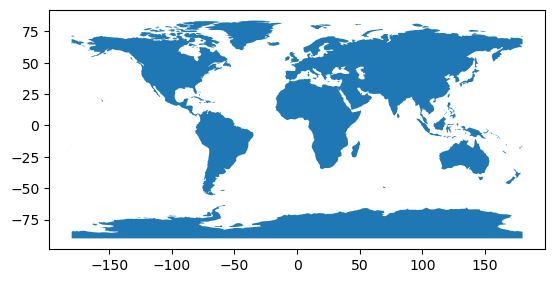

In [2]:
df.plot()

## Plotting with CartoPy
Cartopy also handles Shapely objects well, but it uses a different system for CRS. To plot this data with CartoPy, we’ll first need to project it into a new CRS. We’ll use a CRS defined within CartoPy and use the GeoPandas to_crs method to make the transformation.

<Axes: >

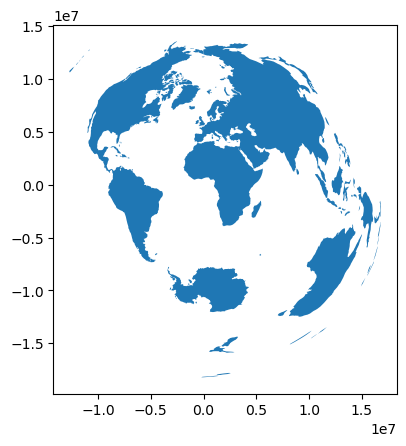

In [3]:
# Define the CartoPy CRS object.
crs = ccrs.AzimuthalEquidistant()

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = df.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot()

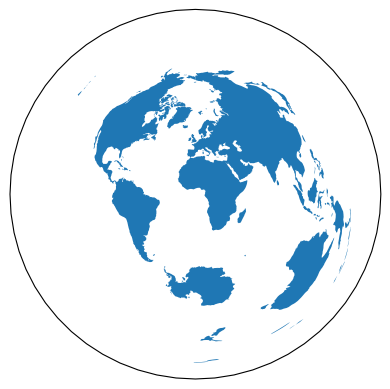

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": crs})
ax.add_geometries(df_ae["geometry"], crs=crs)

Note that we could have easily done this with an EPSG code like so:

<GeoAxes: >

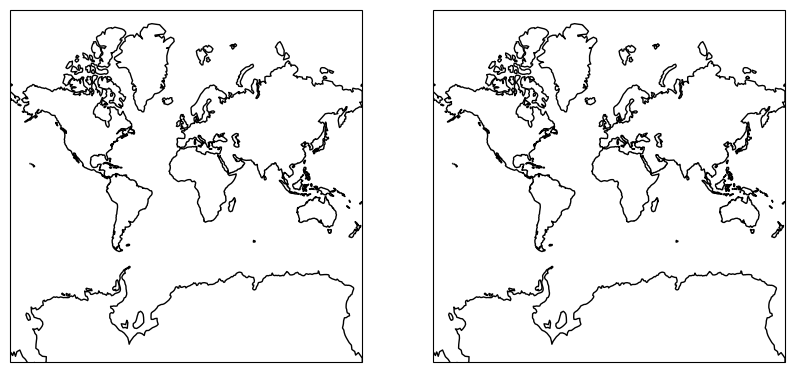

In [5]:
crs_epsg = ccrs.epsg("3857")
df_epsg = df.to_crs(epsg="3857")

# Generate a figure with two axes, one for CartoPy, one for GeoPandas
fig, axs = plt.subplots(1, 2, subplot_kw={"projection": crs_epsg}, figsize=(10, 5))
# Make the CartoPy plot
axs[0].add_geometries(
    df_epsg["geometry"], crs=crs_epsg, facecolor="white", edgecolor="black"
)
# Make the GeoPandas plot
df_epsg.plot(ax=axs[1], color="white", edgecolor="black")

## CartoPy to GeoPandas
Next we’ll perform a CRS projection in CartoPy, and then convert it back into a GeoPandas object.

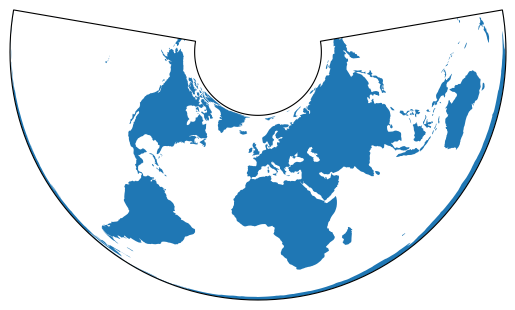

In [6]:
crs_new = ccrs.AlbersEqualArea()
new_geometries = [
    crs_new.project_geometry(ii, src_crs=crs) for ii in df_ae["geometry"].values
]

fig, ax = plt.subplots(subplot_kw={"projection": crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

Now that we’ve created new Shapely objects with the CartoPy CRS, we can use this to create a GeoDataFrame.

<Axes: >

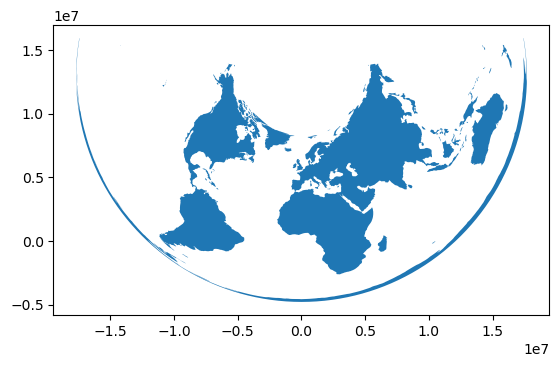

In [7]:
df_aea = geopandas.GeoDataFrame(
    df.drop(columns="geometry"), geometry=new_geometries, crs=crs_new.proj4_init
)
df_aea.plot()

We can even combine these into the same figure. Here we’ll plot the shapes of the countries with CartoPy. We’ll then calculate the centroid of each with GeoPandas and plot it on top.

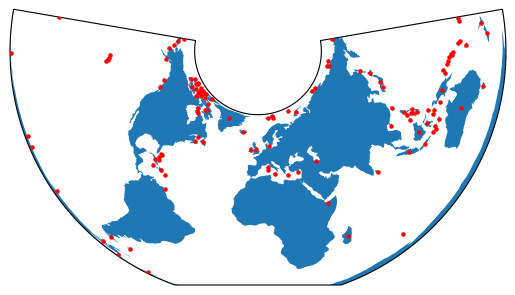

In [8]:
# Generate a CartoPy figure and add the countries to it
fig, ax = plt.subplots(subplot_kw={"projection": crs_new})
ax.add_geometries(new_geometries, crs=crs_new)

# Calculate centroids and plot
df_aea_centroids = df_aea.geometry.centroid
# Need to provide "zorder" to ensure the points are plotted above the polygons
df_aea_centroids.plot(ax=ax, markersize=5, color="r", zorder=10)

plt.show()